In [1]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
## Importo librerías de manipulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Conectamos el drive y guardamos en set de datos en "BankS" especificando el delimitador de datos con sep
from google.colab import drive
drive.mount('/content/drive')
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_subscription.csv', sep=';')

Mounted at /content/drive


In [4]:
## Visualizamos las 5 primeras filas
banks.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


In [5]:
## Imprimo las dimensiones del dataset
banks.shape

(45211, 17)

In [6]:
subscription_counts = banks['Subscription'].value_counts()
print(subscription_counts)

Subscription
0    39922
1     5289
Name: count, dtype: int64


In [7]:
## Mostramos el tipo de dato con el comando .info
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [8]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,40238.0,NaN,NaN,NaN,40.929768,10.631666,18.0,33.0,39.0,48.0,95.0
Job,40238,12,blue-collar,8707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,40238,3,married,24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,40238,4,secondary,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,40238,2,no,39511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),40238.0,NaN,NaN,NaN,1367.154257,3079.452512,-8019.0,72.0,448.0,1425.75,102127.0
Housing Loan,37525,2,yes,20817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,37525,2,no,31536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [9]:
## sumamos la cantidad de valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,4973
Job,4973
Marital Status,4973
Education,4973
Credit,4973
Balance (euros),4973
Housing Loan,7686
Personal Loan,7686
Contact,0
Last Contact Day,0


In [10]:
# Identificamos filas con valores nulos en "Marital Status"
null_marital_status = banks['Marital Status'].isnull()

# Reemplazamos los valores nulos con "Single"
banks.loc[null_marital_status, 'Marital Status'] = 'Single'

In [11]:
# Identificamos filas con valores nulos en "Education"
null_education = banks['Education'].isnull()

# Reemplazamos los valores nulos con "unknown"
banks.loc[null_education, 'Education'] = 'unknown'

In [12]:
# Identificamos filas con valores nulos en "Credit"
null_credit = banks['Credit'].isnull()

# Reemplazamos los valores nulos con "no"
banks.loc[null_credit, 'Credit'] = 'no'

In [13]:
# Identificamos filas con valores nulos en "Balance (euros)"
null_balance = banks['Balance (euros)'].isnull()

# Reemplazamos los valores nulos con 0
banks.loc[null_balance, 'Balance (euros)'] = 0

In [14]:
# Identificamos filas con valores nulos en "Housing Loan"
null_housing_loan = banks['Housing Loan'].isnull()

# Reemplazamos los valores nulos con "no"
banks.loc[null_housing_loan, 'Housing Loan'] = 'no'

In [15]:
# Identificamos filas con valores nulos en "Personal Loan"
null_personal_loan = banks['Personal Loan'].isnull()

# Reemplazamos los valores nulos con "no"
banks.loc[null_personal_loan, 'Personal Loan'] = 'no'

In [16]:
# Identificamos filas con valores nulos en "Job"
null_job = banks['Job'].isnull()

# Reemplazamos los valores nulos con "unknown"
banks.loc[null_job, 'Job'] = 'unknown'

In [17]:
# Identificamos filas con valores nulos en "Pdays"
null_pdays = banks['Pdays'].isnull()

# Reemplazamos los valores nulos con -1
banks.loc[null_pdays, 'Pdays'] = -1

In [18]:
## sumamos la cantidad de valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,4973
Job,0
Marital Status,0
Education,0
Credit,0
Balance (euros),0
Housing Loan,0
Personal Loan,0
Contact,0
Last Contact Day,0


In [19]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,40238.0,NaN,NaN,NaN,40.929768,10.631666,18.0,33.0,39.0,48.0,95.0
Job,45211,12,blue-collar,8707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,45211,4,married,24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,45211,4,secondary,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,45211,2,no,44484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),45211.0,NaN,NaN,NaN,1216.773639,2936.477297,-8019.0,0.0,330.0,1232.5,102127.0
Housing Loan,45211,2,no,24394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,45211,2,no,39222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [20]:
#Se procede a eliminar los valores negativos de la feature.
banks = banks[banks['Balance (euros)'] >= 0]

In [21]:
# Consulto algunas estadísticas descriptivas de los datos
banks.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,37263.0,NaN,NaN,NaN,41.040684,10.737109,18.0,33.0,39.0,49.0,95.0
Job,41875,12,management,7955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,41875,4,married,22483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,41875,4,secondary,18825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit,41875,2,no,41475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance (euros),41875.0,NaN,NaN,NaN,1338.819248,3016.331653,0.0,40.0,406.0,1359.0,102127.0
Housing Loan,41875,2,no,23074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal Loan,41875,2,no,36758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,41875,3,cellular,27382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Contact Day,41875.0,NaN,NaN,NaN,15.755606,8.298261,1.0,8.0,16.0,21.0,31.0


In [22]:
#Se confirma que se borro correctamente los registros con datos de Balance (euros) negativos.
#Se procede a eliminar los registros nulos.
banks = banks.dropna()

In [23]:
## Volvemos a analizar el dataset
banks.shape

(30942, 17)

In [24]:
## Revisamos que no queden valores nulos por cada columna/variable
banks.isnull().sum()

,0
Age,0
Job,0
Marital Status,0
Education,0
Credit,0
Balance (euros),0
Housing Loan,0
Personal Loan,0
Contact,0
Last Contact Day,0


In [28]:
## Visualizamos la cantidad datos en la feature Suscription
subscription_counts = banks['Subscription'].value_counts()
print(subscription_counts)

Subscription
0    27138
1     3804
Name: count, dtype: int64


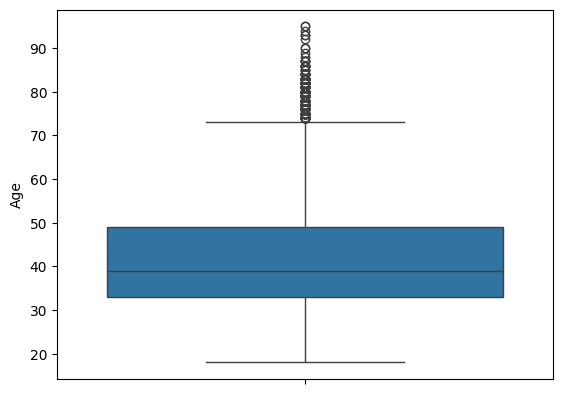

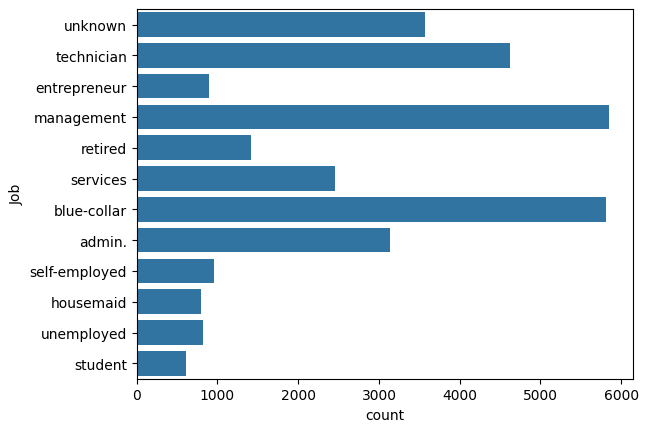

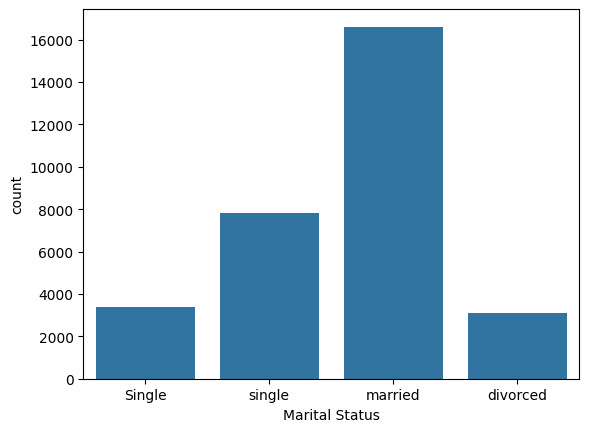

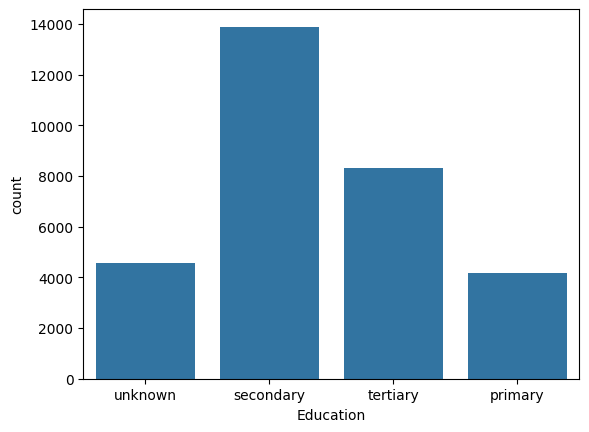

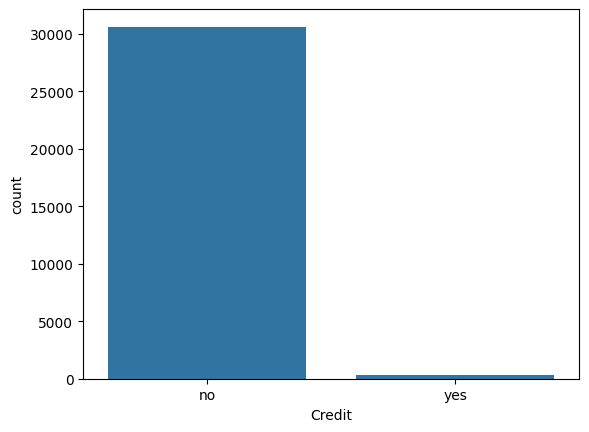

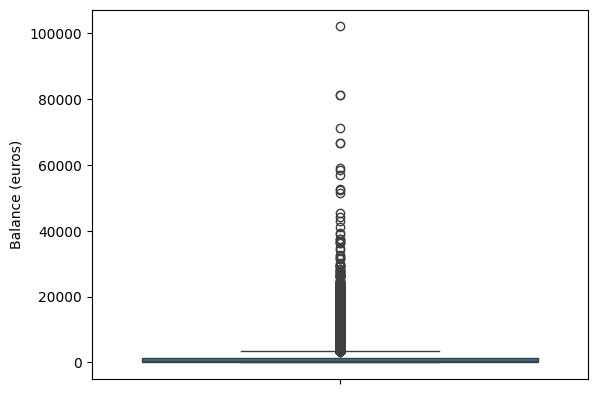

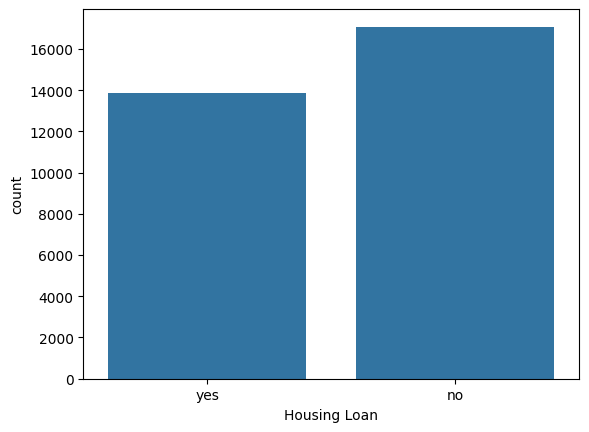

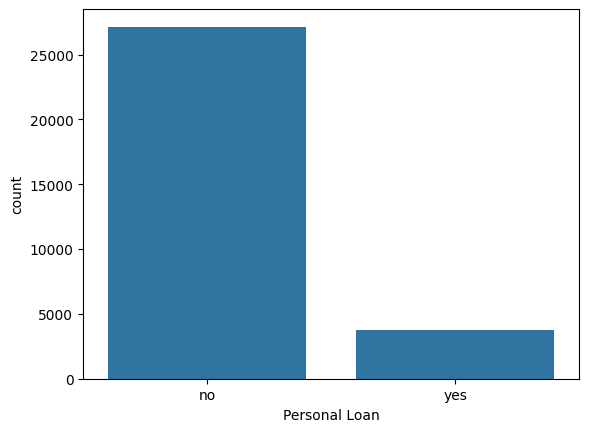

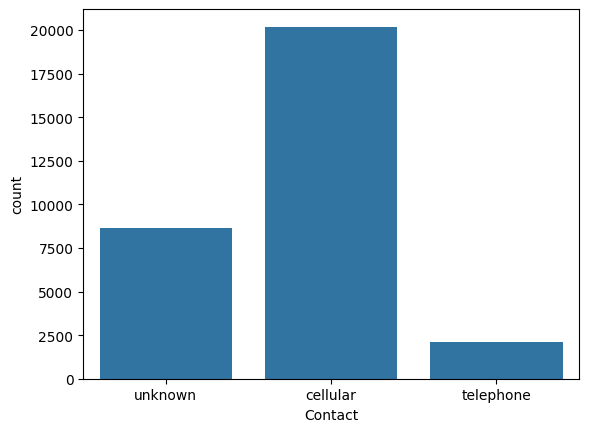

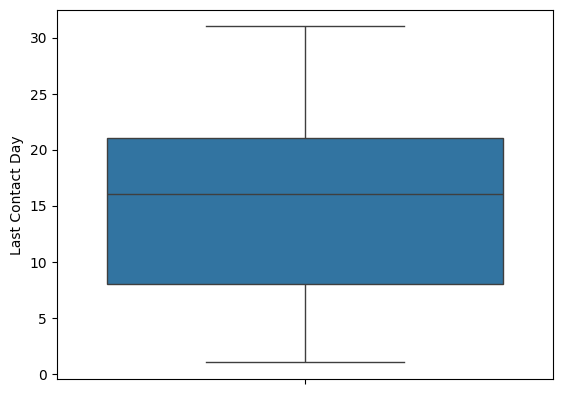

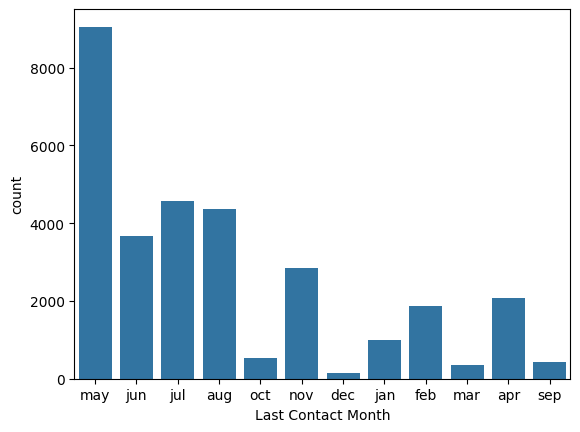

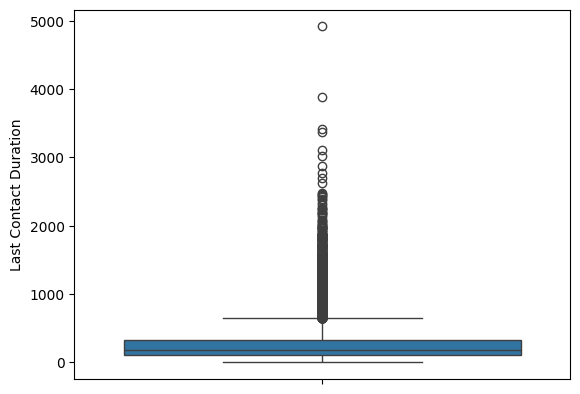

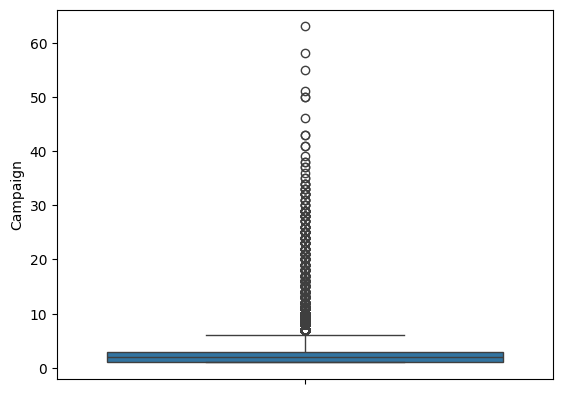

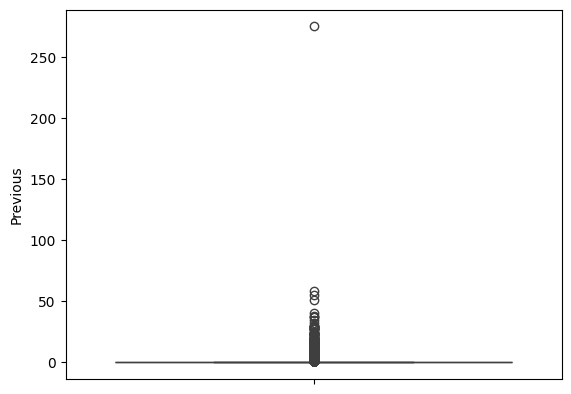

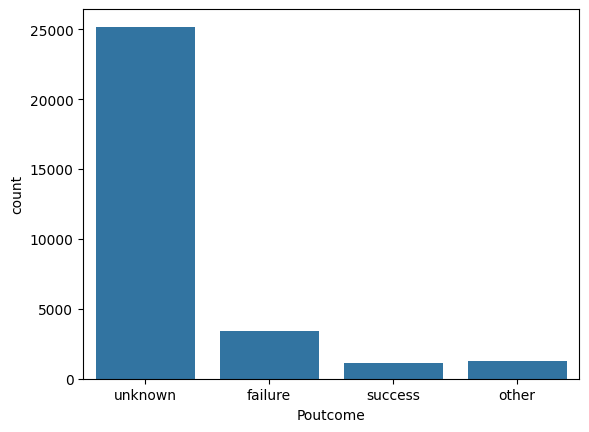

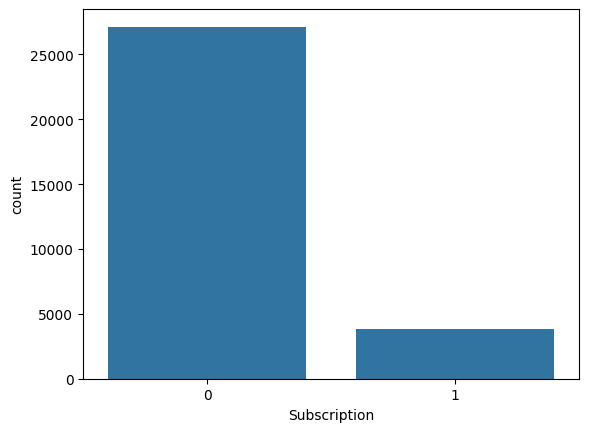

In [29]:
#Analizamos la distribución de las variables mediante el gráfico Bloxplot y countplot.
sns.boxplot(y="Age", data=banks)
plt.show()

sns.countplot( y="Job" , data=banks)
plt.show()


sns.countplot( x="Marital Status" , data=banks)
plt.show()

sns.countplot( x="Education" , data=banks)
plt.show()

sns.countplot( x="Credit" , data=banks)
plt.show()

sns.boxplot(y="Balance (euros)", data=banks)
plt.show()

sns.countplot( x="Housing Loan" , data=banks)
plt.show()

sns.countplot( x="Personal Loan" , data=banks)
plt.show()

sns.countplot( x="Contact" , data=banks)
plt.show()

sns.boxplot(y="Last Contact Day", data=banks)
plt.show()

sns.countplot( x="Last Contact Month" , data=banks)
plt.show()

sns.boxplot(y="Last Contact Duration", data=banks)
plt.show()

sns.boxplot(y="Campaign", data=banks)
plt.show()

sns.boxplot(y="Previous", data=banks)
plt.show()

sns.countplot( x="Poutcome" , data=banks)
plt.show()

sns.countplot( x="Subscription" , data=banks)
plt.show()


In [30]:
#Los Bloxplot exponen algunas variables con valores Outliers. También se observa muchas features con valores "unknown", tanto en Bloxplot como en Countplot.
# Se opta por no filtrar más los registros a fin de no disminuir la cantidad total de los mismos,
# ya que hasta el momento luego del EDA han sido aceptados tan solo 11755 registros de los 45211 iniciales.

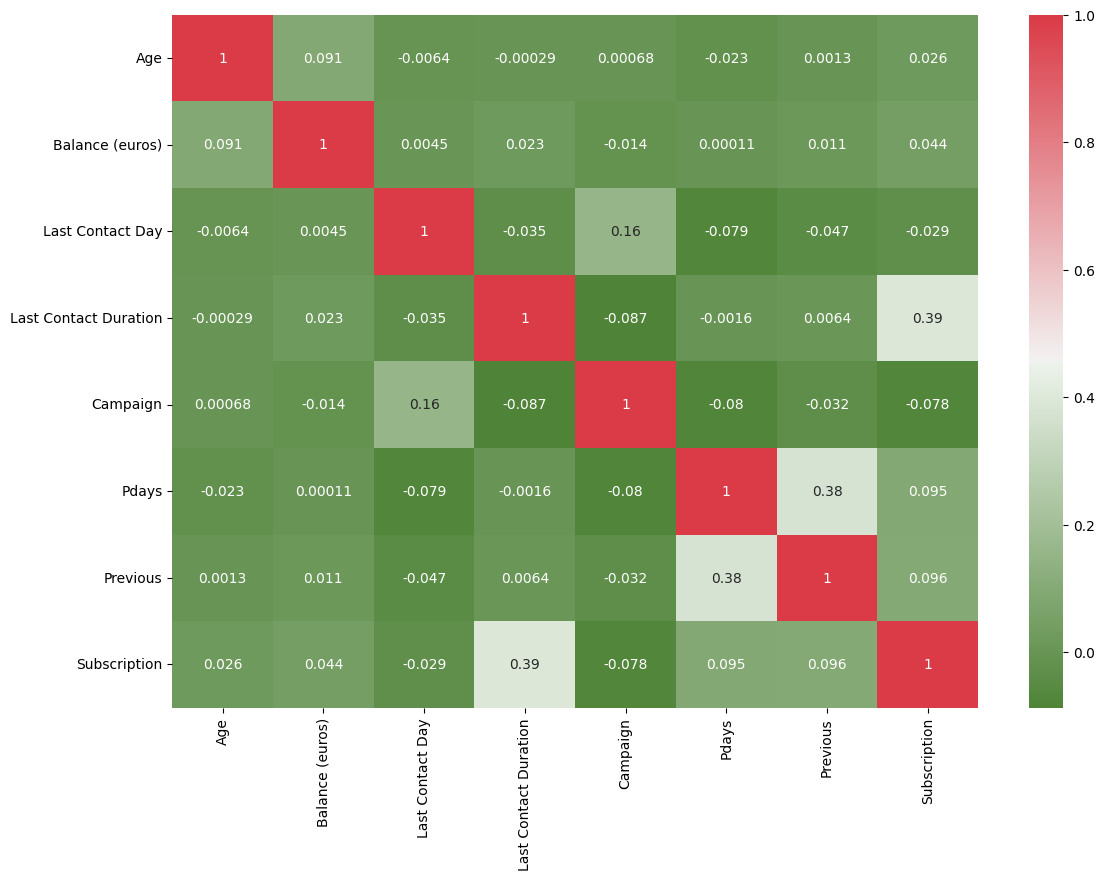

In [31]:
#Realizamos un heat map para analizar la correlacion lineal.
corrmat = banks.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(13, 9))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(120, 10, as_cmap=True))
plt.show()

In [32]:
#La correlación mayor correlación entre variables se encutra entre "Last Contact Duration" y "Subscription" (0.37). Las demás variables poseen bajos valores.

Construimos el modelo LogisticRegression con Pipeline

In [33]:
# Diferenciemos los tipos de variables (numericas, categoricas)
categorical_features = ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome']
numerical_features = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Last Contact Day', 'Campaign', 'Previous']

In [34]:
# Definamos las transformaciones para cada tipo de variable
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [35]:
# Combinamos los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [36]:
# Creamos el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [37]:
# Separamos el set de datos en conjuntos de entrenamiento y prueba
X = banks.drop('Subscription', axis=1)
y = banks['Subscription']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
# Entrenamos el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance (euros)',
                                                   'Last Contact Duration',
                                                   'Last Contact Day',
                                                   'Campaign', 'Previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Job', 'Marital Status',
                                                   'Education', 'Credit',
                                                   'Housing Loan',
                                                   'Personal Loan', 'Contact',
                                                   'Last Contact Month',
                                                   'Poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [39]:
# Realizamos predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [40]:
# Evalúamos el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"El Accuracy es de: {accuracy}")

El Accuracy es de: 0.8950770225142735


In [41]:
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [42]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_prob)

In [43]:
#Computamos el Area debajo de la curva ROC del modelo.
auc = roc_auc_score(y_test, y_prob)
print("El AUC es = "+ str(auc))

El AUC es = 0.9018369112102004


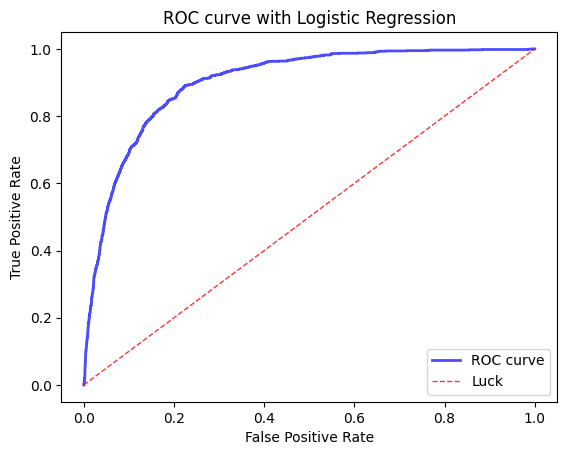

In [44]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7, label='ROC curve', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with Logistic Regression')
plt.show()

In [45]:
# Compute confusion Matrix
cm = confusion_matrix(y_test, y_pred)

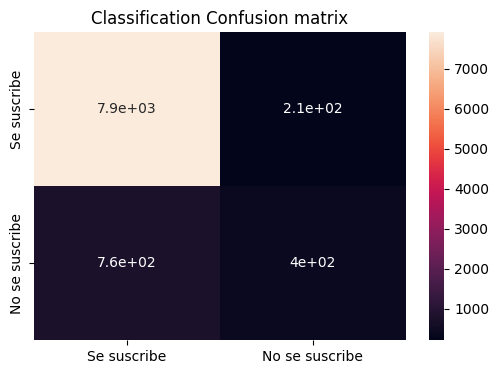

In [46]:
df_cm = pd.DataFrame(cm, index = ['Se suscribe', 'No se suscribe'], columns = ['Se suscribe', 'No se suscribe'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [47]:
# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(pipeline, X_train, y_train, cv=5)

In [48]:
cv_results

{'fit_time': array([0.15307474, 0.19783688, 0.23740029, 0.17512512, 0.17975807]),
 'score_time': array([0.02662754, 0.0267446 , 0.04496932, 0.02659059, 0.02775669]),
 'test_score': array([0.89981533, 0.89473684, 0.89843029, 0.89796861, 0.89886862])}

In [49]:
#El modelo de regresión logistica desarrollado ha alcanzado un AUC=0.9,
# con un buen rendimiento en cuanto a la predicción de la suscripción a la campaña de marketing.

**PCA: preparación y separación de datos**

In [50]:
banks.shape

(30942, 17)

In [51]:
# Separamos el set de datos en conjuntos de entrenamiento y prueba
X = banks.drop('Subscription', axis=1)
y = banks['Subscription']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


In [52]:
X.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome
0,58.0,unknown,Single,unknown,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown
1,44.0,technician,single,secondary,no,0.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown
2,33.0,entrepreneur,Single,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown
3,47.0,unknown,married,unknown,no,1506.0,no,no,unknown,5,may,92.0,1,-1.0,0,unknown
5,35.0,unknown,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown


In [53]:
X.shape

(30942, 16)

In [54]:
#El modelo PCA no soporta variables del tipo "categoricas", con lo cual las convertimos a Dummies para poder procesarñas
X = pd.get_dummies(data=X, columns=['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome'], dtype=float)
banks.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,unknown,Single,unknown,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,0.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,Single,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,0
3,47.0,unknown,married,unknown,no,1506.0,no,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
5,35.0,unknown,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,0


In [55]:
# Consulto algunas estadísticas descriptivas de los datos
X.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,30942.0,41.064896,10.757280,18.0,33.0,39.0,49.0,95.0
Balance (euros),30942.0,1329.607136,2961.008504,0.0,41.0,405.0,1358.0,102127.0
Last Contact Day,30942.0,15.767242,8.301527,1.0,8.0,16.0,21.0,31.0
Last Contact Duration,30942.0,259.597537,257.285973,0.0,104.0,181.0,322.0,4918.0
Campaign,30942.0,2.751858,3.089775,1.0,1.0,2.0,3.0,63.0
Pdays,30942.0,33.544309,92.563660,-1.0,-1.0,-1.0,-1.0,871.0
Previous,30942.0,0.591526,2.485407,0.0,0.0,0.0,0.0,275.0
Job_admin.,30942.0,0.101480,0.301968,0.0,0.0,0.0,0.0,1.0
Job_blue-collar,30942.0,0.187674,0.390458,0.0,0.0,0.0,0.0,1.0
Job_entrepreneur,30942.0,0.028925,0.167599,0.0,0.0,0.0,0.0,1.0


In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=4)

In [57]:
# Hacemos el auto scaling train-set (mean = 0, std = 1)

scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [58]:
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

In [59]:
xtrain_scal.shape

(21659, 52)

**PCA: preparación y separación de datos**

In [60]:
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [61]:
pca.explained_variance_

array([3.53248404, 3.0578174 , 2.36455594, 2.28190264, 1.9550715 ,
       1.93277484, 1.7933544 , 1.50371647, 1.47679083, 1.39565378])

In [62]:
pca.explained_variance_ratio_

array([0.06792925, 0.05880147, 0.04547013, 0.04388072, 0.03759579,
       0.03716703, 0.03448599, 0.02891629, 0.02839851, 0.02683826])

In [63]:
# observamos el shape de la matriz obtenida del PCA. Ver que nuestro dataset se redujo de 30 a 10 dimensiones
xpca.shape

(21659, 10)

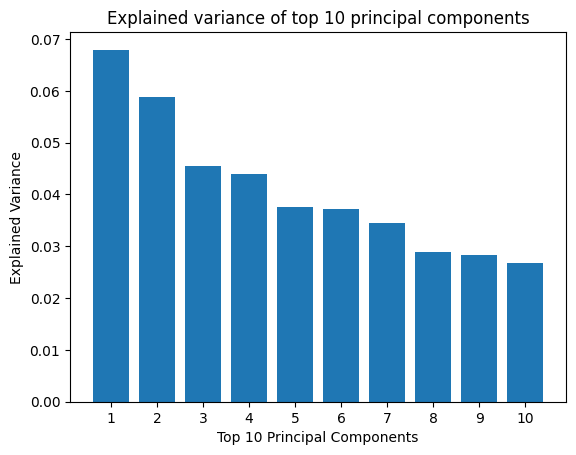

In [64]:
#Observamos la varianza de los 10 componentes principales
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')
plt.xlabel('Top ' +str(n_comps) + ' Principal Components')
plt.ylabel('Explained Variance')
plt.show()

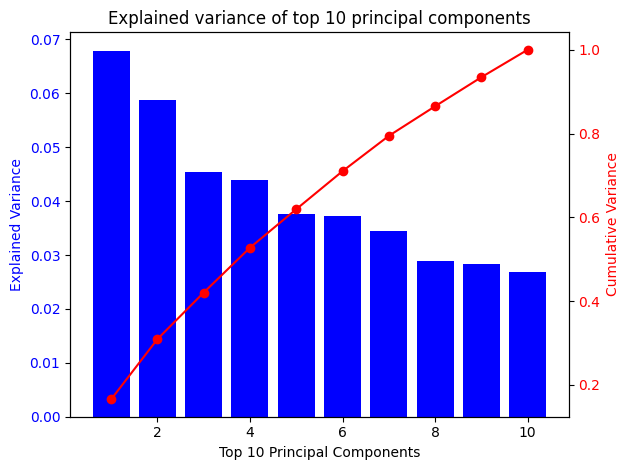

In [65]:
#Graficaremos la variabilidad explicada acumulada
fig, ax1 = plt.subplots()

components = range(1, n_comps + 1)

# Graficar las barras de varianza explicada en el eje izquierdo
ax1.bar(components, eigenvalues, label='Explained Variance', color='blue')
ax1.set_xlabel('Top ' + str(n_comps) + ' Principal Components')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para la varianza acumulada
ax2 = ax1.twinx()
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Graficar la varianza acumulada en el eje derecho
ax2.plot(components, cumulative_variance, color='red', marker='o', label='Cumulative Variance')
ax2.set_ylabel('Cumulative Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Configurar el título y las leyendas
plt.title('Explained variance of top ' + str(n_comps) + ' principal components')

fig.tight_layout()  # Ajustar el layout para que no se superpongan los ejes
plt.show()

In [66]:
#Los componentes obtenidos poseen una varianza "similar", ya que para lograr alcanzar el 80% de la varianza acumulada se requieren 8 de los 10.

<ipython-input-67-8789a425a2cf>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'Rechaza')
<ipython-input-67-8789a425a2cf>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'Acepta')


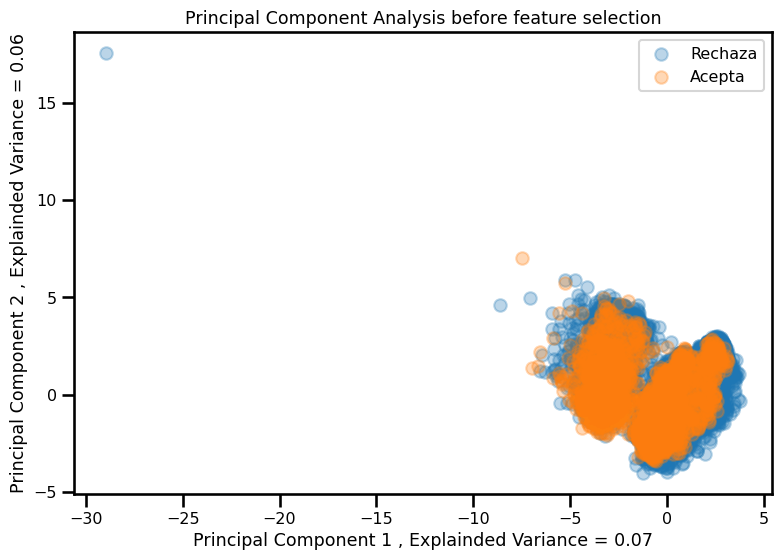

In [67]:
#Se imprimen las 2 componentes principales, siendo la varianza acumulada del 30% aproximadamente del total.
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(ytrain == 0).ravel(),0],xpca.loc[(ytrain == 0).ravel(),1], alpha = 0.3, label = 'Rechaza')
plt.scatter(xpca.loc[(ytrain == 1).ravel(),0],xpca.loc[(ytrain == 1).ravel(),1], alpha = 0.3, label = 'Acepta')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

**Predicción del problema con variables reducidas obtenidas del PCA**

In [68]:
from sklearn.decomposition import PCA, KernelPCA

In [69]:
# Cantidad de PC quer queremos
reduced_dim = 2
# Definimos nuestro nuevo X de dimension reducida
xpca_rd = xpca.iloc[:,0:reduced_dim]

In [70]:
xpca_rd.head()

,0,1
0,-2.014944,3.719725
1,1.714520,0.739899
2,0.589565,1.118176
3,-2.687041,3.919641
4,1.258344,-0.612832


In [71]:
xpca_rd.shape

(21659, 2)

In [72]:
# Separamos el set de datos en conjuntos de entrenamiento y prueba
X = xpca_rd
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Desarrollamos un modelo de logistic regretion para predecir los datos obtenidos del PCA.
# no utilizamos el pipeline anterior ya que quedo configurado para las columnas del dataset inicial (categoricas y númericas).

# defino modelo LR llamado model_lr
model_lr = LogisticRegression()

In [74]:
# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(model_lr, xtrain_scal, ytrain, cv=5)



In [75]:
# analizamos los resultados de cada iteracion del cross validation.
# Este objeto indica el tiempo que tomo cada iteracion, y en "test_score" cuanto dio el resultado de accuracy
cv_results




{'fit_time': array([0.08450603, 0.09644103, 0.09624767, 0.09744096, 0.11713839]),
 'score_time': array([0.00523663, 0.00393891, 0.00575924, 0.00392962, 0.00507689]),
 'test_score': array([0.89935365, 0.89381348, 0.89404432, 0.89750693, 0.89725237])}

In [76]:
# estudiamos como fue el promedio de todos los accuracys a lo largo de todas las iteraciones de cross validation
np.mean(cv_results['test_score'])


0.8963941483087099

In [77]:
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
model_lr.fit(xtrain_scal, ytrain)

LogisticRegression()

In [78]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = model_lr.predict(xtest_scal)

In [79]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9013250026930949


In [80]:
#compute and plot AUC
yproba = model_lr.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.9008434216014973


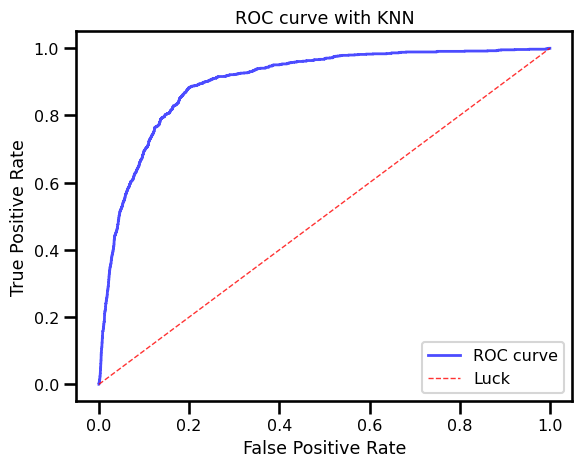

In [81]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

In [82]:
# Compute confusion Matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[7980,  208],
       [ 708,  387]])

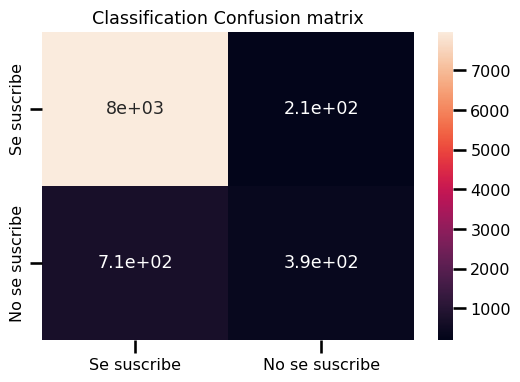

In [83]:
df_cm = pd.DataFrame(cm, index = ['Se suscribe', 'No se suscribe'], columns = ['Se suscribe', 'No se suscribe'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [84]:
#Luego de volver a predecir el problema con dimension reducida del PCA obtuvimos resultados levemente peores (Accuracy inicial= 0.89849730649277 vs Accuracy reducido= 0.8953572628865409)
#Es decir, si bien hubo una leve disminución de la precisión, se logro una gran reducción de la complejidad del problema
# y aumento de la performance del modelo (cantidad de features iniciales =16 vs fetures final=2).